<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [16]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [20]:
# Your code here
import requests
from bs4 import BeautifulSoup
import csv


Download the webpage at the url


In [21]:
#your code goes here
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
response = requests.get(url)
html = response.text


Create a soup object


In [22]:
#your code goes here
soup = BeautifulSoup(html, "html.parser")


Scrape the `Language name` and `annual average salary`.


In [24]:
# Trouver la table
table = soup.find("table")

# Initialiser une liste pour stocker les données
data = []

# Parcourir les lignes de la table
for row in table.find_all("tr")[1:]:  # On saute l'en-tête
    cols = row.find_all("td")
    language = cols[1].text.strip()  # colonne 2 = Language
    salary = cols[3].text.strip()    # colonne 4 = Average Annual Salary
    # Nettoyer le salaire pour enlever $ et , et convertir en int
    salary = int(salary.replace("$", "").replace(",", ""))
    data.append([language, salary])


In [25]:
data

[['Python', 114383],
 ['Java', 101013],
 ['R', 92037],
 ['Javascript', 110981],
 ['Swift', 130801],
 ['C++', 113865],
 ['C#', 88726],
 ['PHP', 84727],
 ['SQL', 84793],
 ['Go', 94082]]

Save the scrapped data into a file named *popular-languages.csv*


In [26]:
# your code goes here
with open("popular-languages.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Language", "Average Annual Salary"])  # En-tête
    writer.writerows(data)


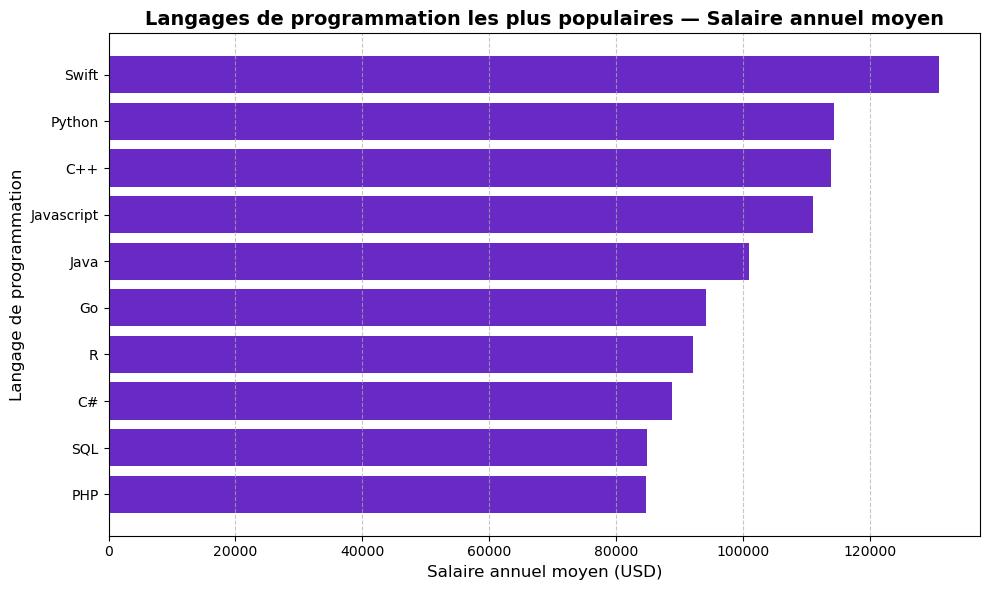

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Lecture des données ---
df = pd.read_csv("popular-languages.csv")

# --- Trier par salaire décroissant ---
df_sorted = df.sort_values(by="Average Annual Salary", ascending=False)

# --- Création du diagramme à barres horizontales ---
plt.figure(figsize=(10, 6))
plt.barh(df_sorted["Language"], df_sorted["Average Annual Salary"], color="#6929C4") #cornflowerblue

# --- Ajuster l’ordre (langages les mieux payés en haut) ---
plt.gca().invert_yaxis()

# --- Titres et labels en français ---
plt.title("Langages de programmation les plus populaires — Salaire annuel moyen", 
          fontsize=14, fontweight='bold')
plt.xlabel("Salaire annuel moyen (USD)", fontsize=12)
plt.ylabel("Langage de programmation", fontsize=12)

# --- Améliorations esthétiques ---
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- Afficher le graphique ---
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
